In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv('C:\pyml_scripts\chapter11_ensemble\winequality-red.csv',sep=';')
X = wine_df.drop('quality',axis=1)
y = wine_df["quality"]

#xgboost 1.6.1需要先將y進行LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)
Xs = StandardScaler().fit_transform(X)
Xn = Normalizer().fit_transform(X)
Xm = MinMaxScaler().fit_transform(X)
Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y_le,test_size=0.1,random_state=123)
Xn_train,Xn_test,y_train,y_test = train_test_split(Xn,y_le,test_size=0.1,random_state=123)
Xm_train,Xm_test,y_train,y_test = train_test_split(Xn,y_le,test_size=0.1,random_state=123)
train_data, test_data, train_label, test_label = train_test_split(X, y,test_size=0.1,random_state=123)

In [3]:
#LabelEncoder編碼與原本標籤對應
print(y_train[:10])
print((train_label.values[:10]))

[2 4 3 3 3 2 3 3 3 3]
[5 7 6 6 6 5 6 6 6 6]


In [4]:
#將LabelEncoder編碼回復原本標籤
list(le.inverse_transform([2,4,3,3,3,2,3,3,3,3]))

[5, 7, 6, 6, 6, 5, 6, 6, 6, 6]

In [5]:
train_data.shape

(1439, 11)

In [6]:
xgbc = XGBClassifier()

In [7]:
xgbc.fit(Xs_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [8]:
print("訓練準確度",xgbc.score(Xs_train,y_train),"測試準確度",xgbc.score(Xs_test,y_test))

訓練準確度 1.0 測試準確度 0.675


In [9]:
xgbc_v1 = XGBClassifier(learning_rate=0.1,n_estimators=200,max_depth=8,min_child_weight=1,
                        gamma=0.4,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',
                        nthread=8,scale_pos_weight=1)
xgbc_v1.fit(Xs_train,y_train)
print("訓練準確度",xgbc_v1.score(Xs_train,y_train),"測試準確度",xgbc_v1.score(Xs_test,y_test))

[14:52:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

訓練準確度 1.0 測試準確度 0.6875


In [10]:
xgbc_v2 = XGBClassifier(learning_rate=0.1,n_estimators=300,max_depth=8,min_child_weight=1,
                        gamma=0.4,subsample=0.8,colsample_bytree=0.8,objective='multi:sofmax',
                        nthread=8,scale_pos_weight=1)

xgbc_v2.fit(Xs_train,y_train)
print("訓練準確度",xgbc_v2.score(Xs_train,y_train),"測試準確度",xgbc_v2.score(Xs_test,y_test))

[14:52:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

訓練準確度 1.0 測試準確度 0.675


In [11]:
xgbc_v2 = XGBClassifier(learning_rate=0.01,n_estimators=200,max_depth=8,min_child_weight=1,
                        gamma=0.4,subsample=0.8,colsample_bytree=0.8,objective='reg:logistic',
                        nthread=8,scale_pos_weight=1)

xgbc_v2.fit(Xs_train,y_train)
print("訓練準確度",xgbc_v2.score(Xs_train,y_train),"測試準確度",xgbc_v2.score(Xs_test,y_test))

[14:52:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

訓練準確度 0.9173036831132731 測試準確度 0.65625


In [12]:
xgbc_v2 = XGBClassifier(learning_rate=0.1,n_estimators=200,max_depth=8,min_child_weight=1,
                        gamma=0.4,subsample=0.8,colsample_bytree=0.8,objective='multi:sofmax',
                        nthread=8,scale_pos_weight=1)

xgbc_v2.fit(Xn_train,y_train)
print("訓練準確度",xgbc_v2.score(Xn_train,y_train),"測試準確度",xgbc_v2.score(Xn_test,y_test))

[14:52:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

訓練準確度 1.0 測試準確度 0.65625


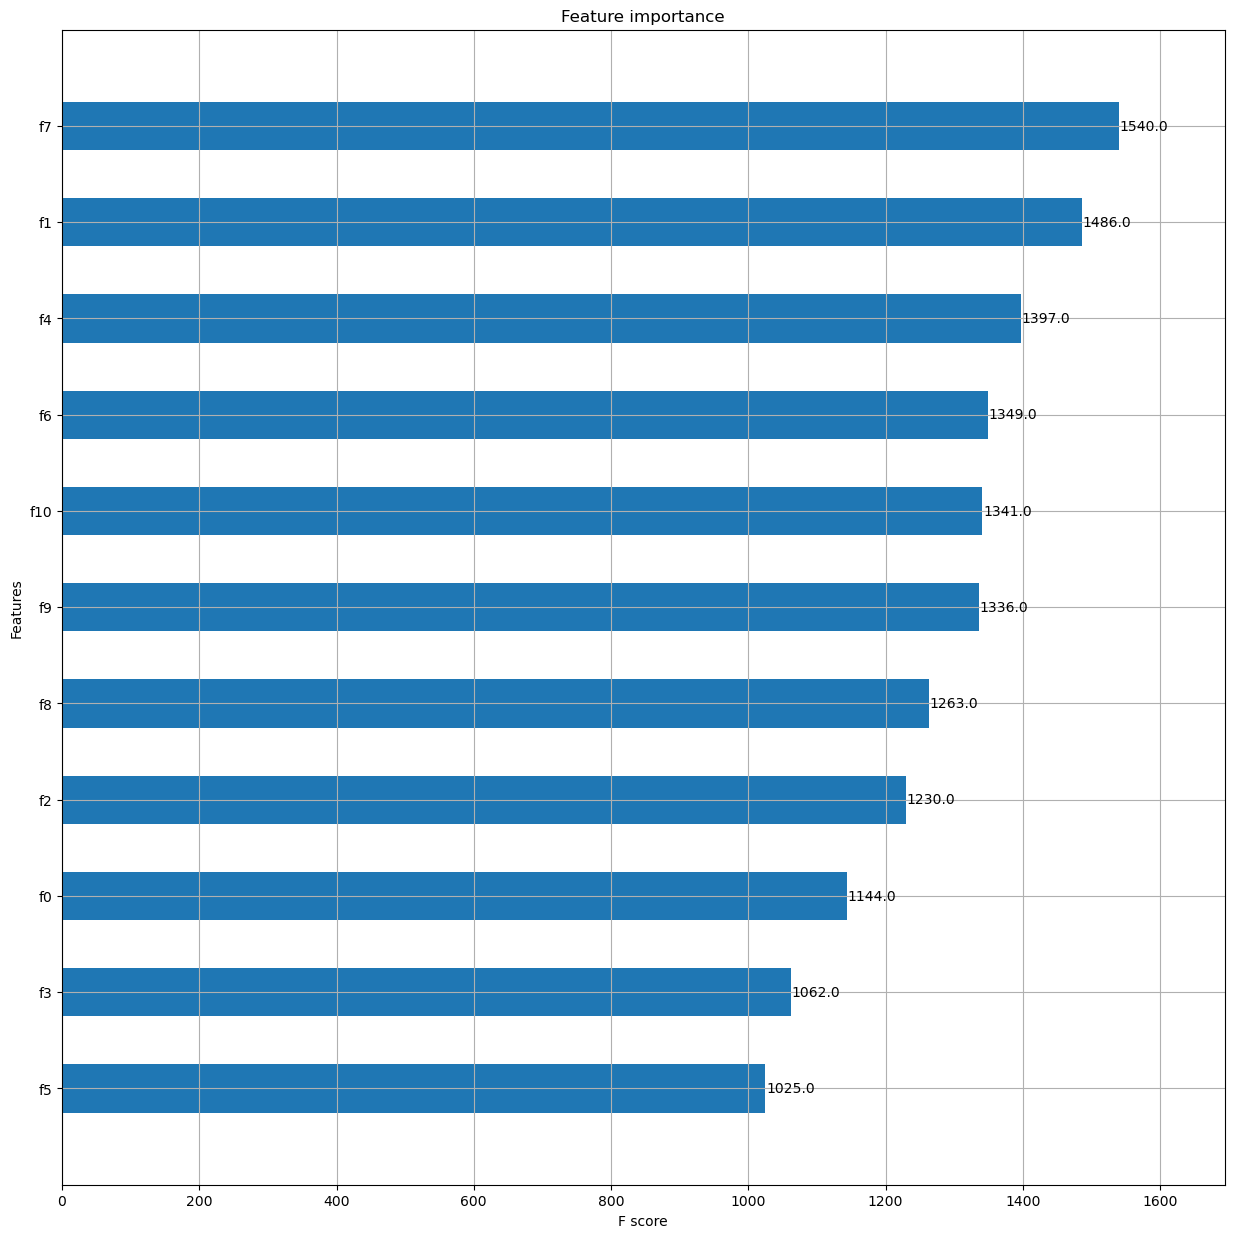

In [13]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc_v1,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()